In [177]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(42)

# Аппроксимация

Начальное изображение

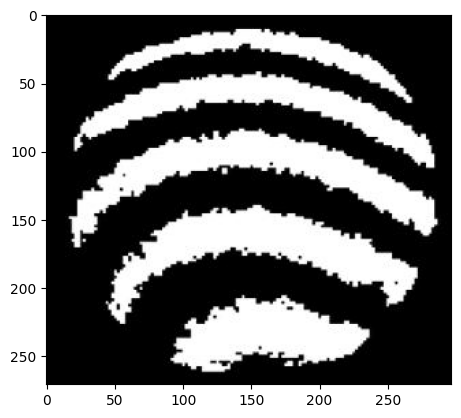

In [178]:
im = plt.imread('pic1.png')

plt.imshow(im)
plt.show()

Вспомогательные функции

In [179]:
def is_black(rgba):
  return rgba[0] == rgba[1] == rgba[2] == 0

def is_white(rgba):
  return rgba[0] == rgba[1] == rgba[2] == 1

Нужно почистить изображение

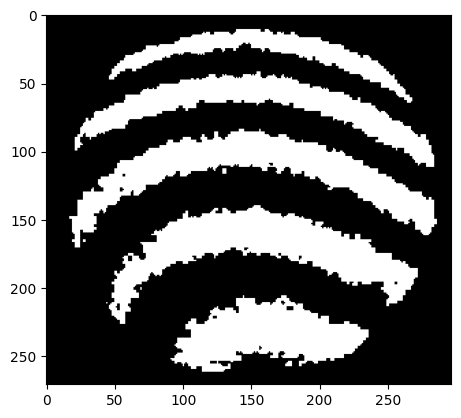

In [180]:
im2 = np.copy(im)

for y in range(len(im2)):
  for x in range(len(im2[0])):
    current = im2[y][x]
    if not is_black(current) and not is_white(current):
      current_sum = sum(current)
      im2[y][x] = [0, 0, 0, 1] if current_sum < 3 else [1, 1, 1, 1]

plt.imshow(im2)
plt.show()

Наметим примерные границы линий

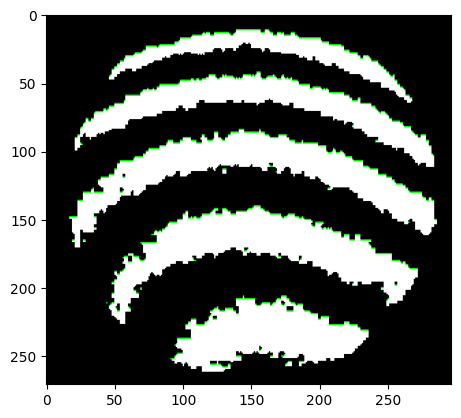

In [181]:
im3 = np.copy(im2)

curves_points = []

for y in range(len(im3)):
  for x in range(len(im3[0])):
    is_prev_black = False if y == 0 else is_black(im3[y - 1][x])
    is_curr_white = is_white(im3[y][x])

    if is_prev_black and is_curr_white:
      im3[y][x] = [0, 1, 0, 1]
      curves_points.append([x, y])

plt.imshow(im3)
plt.show()

Выделим линии и уберем из них самые короткие

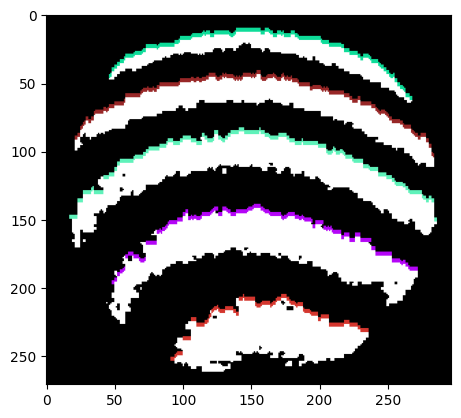

In [182]:
x_sorted_curves_points = sorted(curves_points, key=lambda p: p[0])

def get_curve():
  fp = x_sorted_curves_points.pop(0)

  curve = [fp]

  if len(x_sorted_curves_points) == 0:
    return curve

  p = min(x_sorted_curves_points, key=lambda point: math.dist(point, fp))
  dist = math.dist(p, fp)

  #
  # настроить макисмальное растояние
  #
  while dist < 15:
    curve.append(p)
    x_sorted_curves_points.remove(p)

    x_closest = list(filter(lambda point: point[0] - curve[-1][0] == 1, x_sorted_curves_points))

    if len(x_closest) == 0:
      break

    p = min(x_closest, key=lambda point: math.dist(point, curve[-1]))
    dist = math.dist(p, curve[-1])
  
  return curve

im4 = np.copy(im2)

curves = []

while len(x_sorted_curves_points) > 0:
  curve = get_curve()

  #
  # настроить минимальную длину
  #
  if len(curve) < 10:
    continue

  curves.append(curve)

  color = np.append(np.random.uniform(0, 1, [3]), [1])
  for p in curve:
    im4[p[1]][p[0]] = color
    im4[p[1] + 1][p[0]] = color
    im4[p[1] - 1][p[0]] = color

plt.imshow(im4)
plt.show()

 
0.01723 x + 102.6
          2
0.003101 x - 0.9191 x + 154.6
            3            2
-5.058e-06 x + 0.005392 x - 1.21 x + 163.7
           4             3            2
3.702e-08 x - 2.742e-05 x + 0.009882 x - 1.547 x + 170.9
            5             4             3           2
-3.571e-10 x + 3.066e-07 x - 0.0001017 x + 0.01893 x - 2.012 x + 178.4


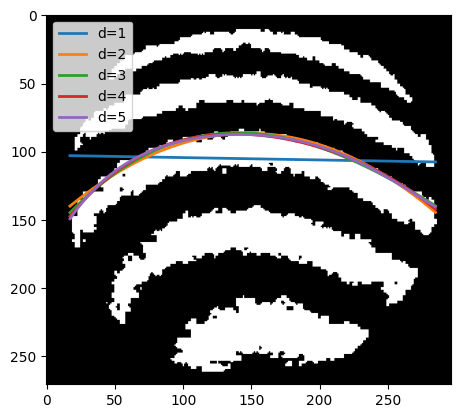

 
0.0506 x + 51.81
          2
0.002635 x - 0.7505 x + 97.51
           3            2
-8.41e-07 x + 0.003019 x - 0.8001 x + 99.14
           4             3            2
3.624e-08 x - 2.287e-05 x + 0.007505 x - 1.146 x + 107
            5             4             3           2
-1.547e-10 x + 1.538e-07 x - 5.565e-05 x + 0.01158 x - 1.364 x + 110.8


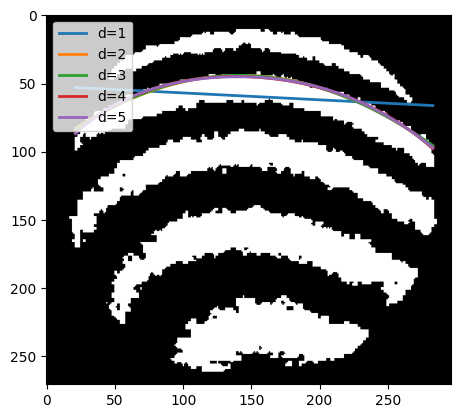

 
0.06382 x + 13.4
          2
0.002954 x - 0.8607 x + 73.62
           3             2
4.684e-06 x + 0.0007547 x - 0.5512 x + 61.08
           4             3           2
1.028e-07 x - 5.965e-05 x + 0.01477 x - 1.787 x + 97.49
           5             4             3            2
3.924e-10 x - 2.042e-07 x + 3.107e-05 x + 0.002255 x - 0.9909 x + 79.03


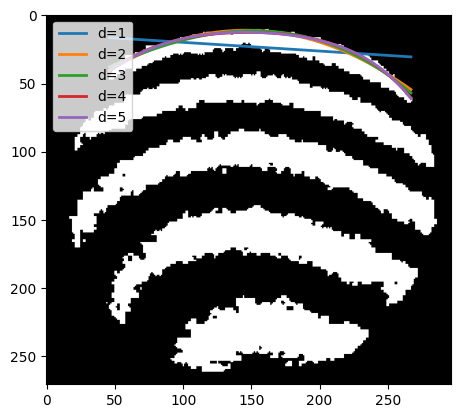

 
0.03024 x + 154.1
          2
0.003812 x - 1.186 x + 235.2
            3          2
-1.398e-05 x + 0.0105 x - 2.148 x + 275.1
          4            3           2
5.63e-08 x - 4.99e-05 x + 0.01849 x - 2.868 x + 296.9
            5            4             3           2
-5.609e-11 x + 1.01e-07 x - 6.339e-05 x + 0.02039 x - 2.992 x + 299.9


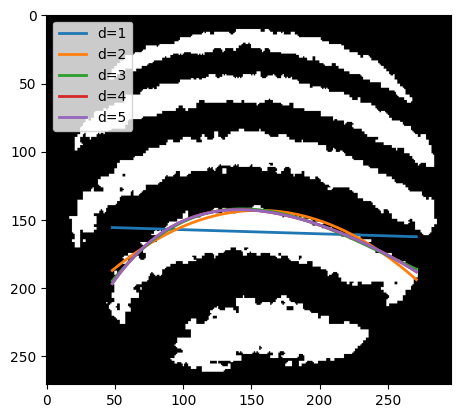

 
-0.04843 x + 228.5
          2
0.006339 x - 2.115 x + 385.8
           3           2
-5.12e-05 x + 0.03138 x - 6.035 x + 581.3
           4            3           2
-3.88e-08 x - 2.59e-05 x + 0.02537 x - 5.42 x + 558.4
            5             4            3          2
-1.166e-08 x + 9.464e-06 x - 0.003056 x + 0.4971 x - 41.23 x + 1618


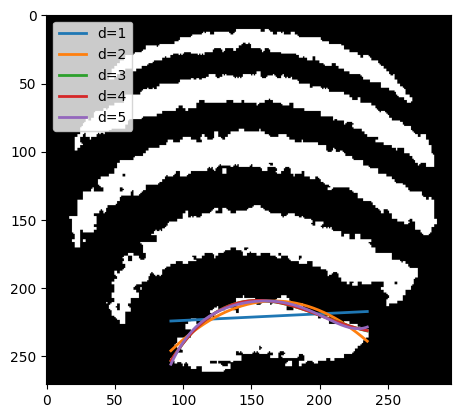

In [183]:
def poly(curve):
  x = list(map(lambda p: p[0], curve))
  y = list(map(lambda p: p[1], curve))

  legend = []
  for d in range(1, 6):
    fp, residuals, rank, sv, rcond = np.polyfit(x, y, d, full=True)

    f = np.poly1d(fp)

    print(f)
    plt.plot(x, f(x), linewidth=2)
    legend.append("d=%i" % f.order)


  plt.imshow(im2)
  plt.legend(legend, loc="upper left")
  plt.show()

for i in range(len(curves)):
  poly(curves[i])